## <center> Sentiment analysis using IMDB dataset

In [1]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAvgPool1D
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

#### Defining target names:

In [3]:
class_names = ['Negative', 'Positive']

In [4]:
word_index = imdb.get_word_index()
print(word_index['hi'])

6593


### Decoding the review

In [5]:
reverse_word_index = dict((value, key) for key , value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

In [6]:
decode(x_train[1])

"the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them "

#### Reviews are not of same length. So we need to make them of same length. For this purpose we may use padding.

### Padding

In [7]:
x_train = pad_sequences(x_train, maxlen=256,value=word_index['the'],padding= 'post')
x_test = pad_sequences(x_test, maxlen=256, value=word_index['the'], padding='post')

### Model building

In [8]:
model = Sequential([
    Embedding(10000,16),
    GlobalAvgPool1D(),
    Dense(16,activation='relu'),
    Dense(1,activation= 'sigmoid')
])

In [9]:
model.compile(
    optimizer= 'adam',
    loss= 'binary_crossentropy',
    metrics=['acc']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs= 100,
)

Epoch 1/100
625/625 [==============================] - 3s 3ms/step - loss: 0.5456 - acc: 0.7674 - val_loss: 0.3528 - val_acc: 0.8670
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 0.2810 - acc: 0.8950 - val_loss: 0.2891 - val_acc: 0.8850
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 0.2147 - acc: 0.9197 - val_loss: 0.2765 - val_acc: 0.8898
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1756 - acc: 0.9371 - val_loss: 0.2867 - val_acc: 0.8866
Epoch 5/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1477 - acc: 0.9480 - val_loss: 0.2924 - val_acc: 0.8886
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1255 - acc: 0.9568 - val_loss: 0.3140 - val_acc: 0.8886
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1060 - acc: 0.9653 - val_loss: 0.3376 - val_acc: 0.8854
Epoch 8/100
625/625 [==============================] - 2s 3ms/step - 

625/625 [==============================] - 2s 3ms/step - loss: 2.1325e-05 - acc: 1.0000 - val_loss: 2.0711 - val_acc: 0.8484
Epoch 62/100
625/625 [==============================] - 2s 3ms/step - loss: 1.4213e-05 - acc: 1.0000 - val_loss: 2.0886 - val_acc: 0.8486
Epoch 63/100
625/625 [==============================] - 2s 3ms/step - loss: 1.1808e-05 - acc: 1.0000 - val_loss: 2.1029 - val_acc: 0.8492
Epoch 64/100
625/625 [==============================] - 2s 3ms/step - loss: 8.6622e-06 - acc: 1.0000 - val_loss: 2.1219 - val_acc: 0.8486
Epoch 65/100
625/625 [==============================] - 2s 3ms/step - loss: 8.0043e-06 - acc: 1.0000 - val_loss: 2.1584 - val_acc: 0.8490
Epoch 66/100
625/625 [==============================] - 2s 3ms/step - loss: 0.0023 - acc: 0.9990 - val_loss: 2.1605 - val_acc: 0.8486
Epoch 67/100
625/625 [==============================] - 2s 3ms/step - loss: 0.0030 - acc: 0.9989 - val_loss: 2.2209 - val_acc: 0.8490
Epoch 68/100
625/625 [==============================] -

### Predictions and Evaluation

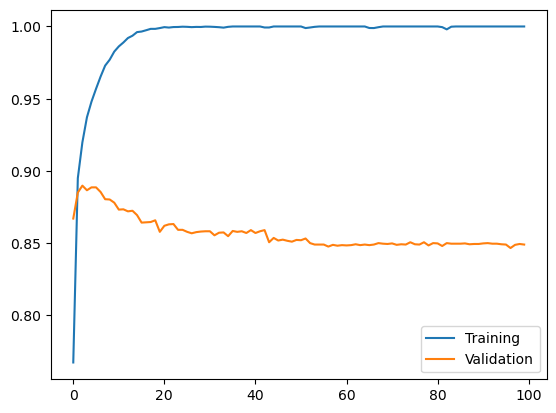

In [12]:
plt.plot(range(100), history.history['acc'])
plt.plot(range(100),history.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.show()

In [13]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy: ', acc * 100)

782/782 [==============================] - 1s 1ms/step - loss: 2.7295 - acc: 0.8287
Test set accuracy:  82.86799788475037


In [14]:
prediction = model.predict(np.expand_dims(x_test[0], axis=0))
class_names = ['Negative', 'Positive']
print(class_names[int(np.squeeze(prediction[0]) > 0.5)])

1/1 [==============================] - 0s 77ms/step
Positive


In [15]:
print(decode(x_test[0]))

the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 